 - backpropagation is at the mathematical core of any modern deep learning library. 
 - 'micrograd' is the essence of every neural network. Everything else is just for effeciency. 

-----------

In [1]:
# we need a datastructure to store the complex mathematical expressions of neural nets
class Value:
    def __init__(self,data):
        self.data = data
    
    # way to print the values nicely when objects are printed
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data)
    
    def __mul__(self, other):
        return Value(self.data * other.data)
    

In [2]:
a = Value(2.0)
b = Value(-3.0)
c = Value(5.0)

print(a+b)
print(a*b)
print(a+b*c)


Value(data=-1.0)
Value(data=-6.0)
Value(data=-13.0)


------------

In [3]:
# adding "connecting tissue" to Value using 'children' and 'operators'
# this is basically storing and printing out the values involved in the operation and operation itself along with the result. 
class Value:
    def __init__(self,data, _children = (), _op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
    
    # way to print the values nicely when objects are printed
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self,other),'+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self,other), 'x')

In [4]:
a = Value(2.0)
b = Value(-3.0)
c = Value(5.0)

d = a*b + c

print(d)
print(d._prev)
print(d._op)

Value(data=-1.0)
{Value(data=5.0), Value(data=-6.0)}
+


---------

In [5]:
# As expressions get more complex, we better have a way  to visualize them. The following code does this. 
from graphviz import Digraph

def trace(root):
    # builds graph's nodes and edges
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={'rankdir':'LR'}) # left 2 right

    nodes,edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for every node, create a rectangle ("record")
        dot.node(name = uid, label ="{ data %.4f }" % (n.data, ), shape = 'record')

        if n._op:
            # create a node for the operator if this is result of an operation
            dot.node(name=uid+n._op, label = n._op)
            # connect result with operator
            dot.edge(uid+n._op, uid)
    
    for n1, n2 in edges:
        # connecting n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

        

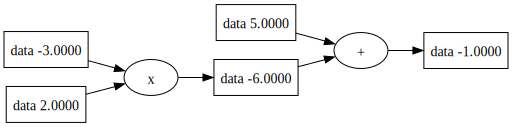

In [6]:
# demo of above graph viz
a = Value(2.0)
b = Value(-3.0)
c = Value(5.0)

d = a*b + c

draw_dot(d)



------------

In [12]:
# modify to add label to each node for better understanding
class Value:
    def __init__(self,data, _children = (), _op='', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    # way to print the values nicely when objects are printed
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self,other),'+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self,other), 'x')

In [13]:
# modify draw_dot to include label
# As expressions get more complex, we better have a way  to visualize them. The following code does this. 
from graphviz import Digraph

def trace(root):
    # builds graph's nodes and edges
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={'rankdir':'LR'}) # left 2 right

    nodes,edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for every node, create a rectangle ("record")
        dot.node(name = uid, label ="{ %s | data %.4f }" % (n.label, n.data, ), shape = 'record')

        if n._op:
            # create a node for the operator if this is result of an operation
            dot.node(name=uid+n._op, label = n._op)
            # connect result with operator
            dot.edge(uid+n._op, uid)
    
    for n1, n2 in edges:
        # connecting n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [16]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a*b; e.label = 'e'
d = e+c; d.label = 'd'

f = Value(-2.0, label='f')
L=d*f; L.label = 'L'
L


Value(data=-8.0)

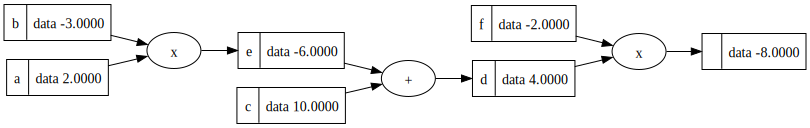

In [17]:
draw_dot(L)